In [65]:
import spacy
import random
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)

In [2]:
nlp = spacy.load('en_core_web_lg', disable='ner')

In [3]:
def loadAndSample(filename): 
    raw = open(filename).read().split('\n')
    sample = random.sample(raw, 200)
    return '\n'.join(sample)

In [19]:
def analyzePOS(raw): 
    doc = nlp(raw)
    length = len(doc)
    POSdict = {}
    for w in doc: 
        tag = spacy.explain(w.tag_)
        if tag in POSdict: 
            POSdict[tag] += 1
        else: 
            POSdict[tag] = 1
    return pd.Series(POSdict)/length

In [20]:
firstRaw = loadAndSample('chaps-firstParas.txt')

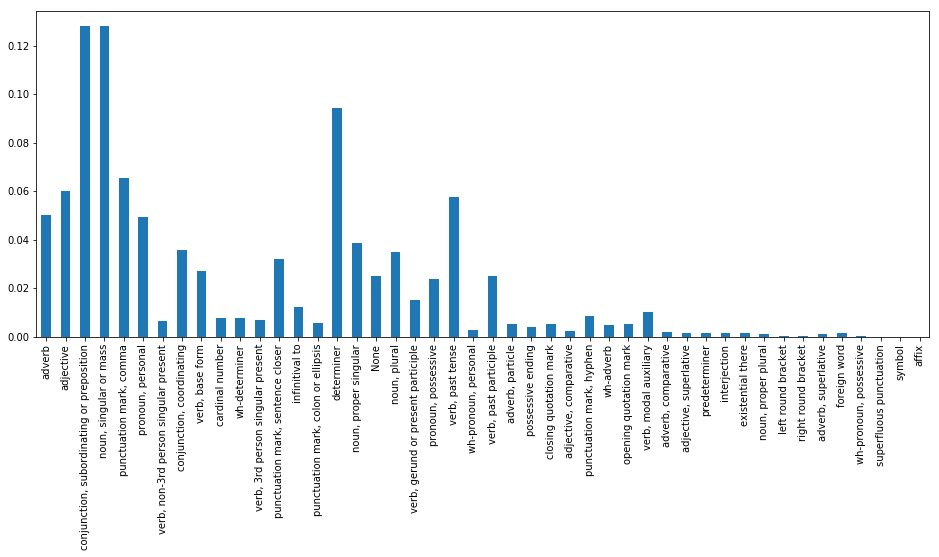

In [21]:
firstSeries = analyzePOS(firstRaw)
firstSeries.plot(kind='bar')

In [22]:
midsRaw = loadAndSample('chaps-midParas.txt')

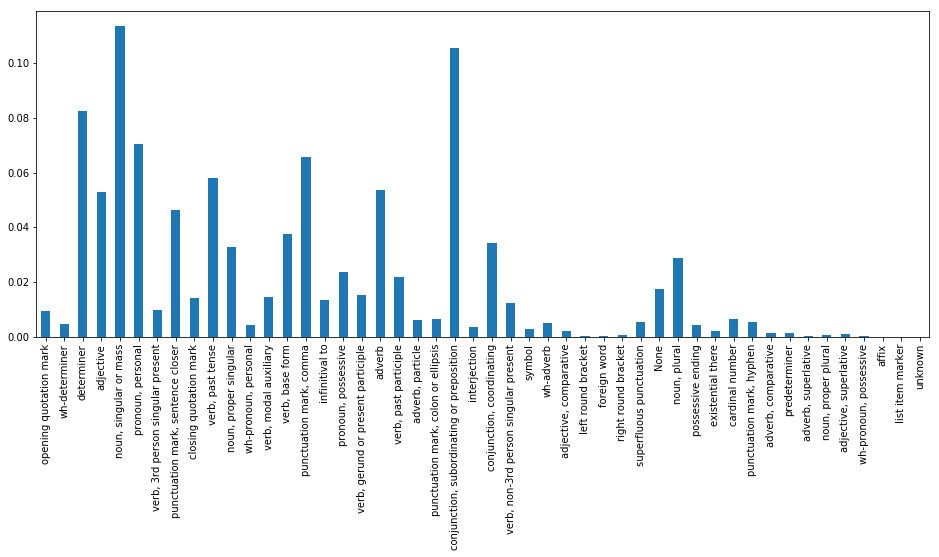

In [23]:
midsSeries = analyzePOS(midsRaw)
midsSeries.plot(kind='bar')

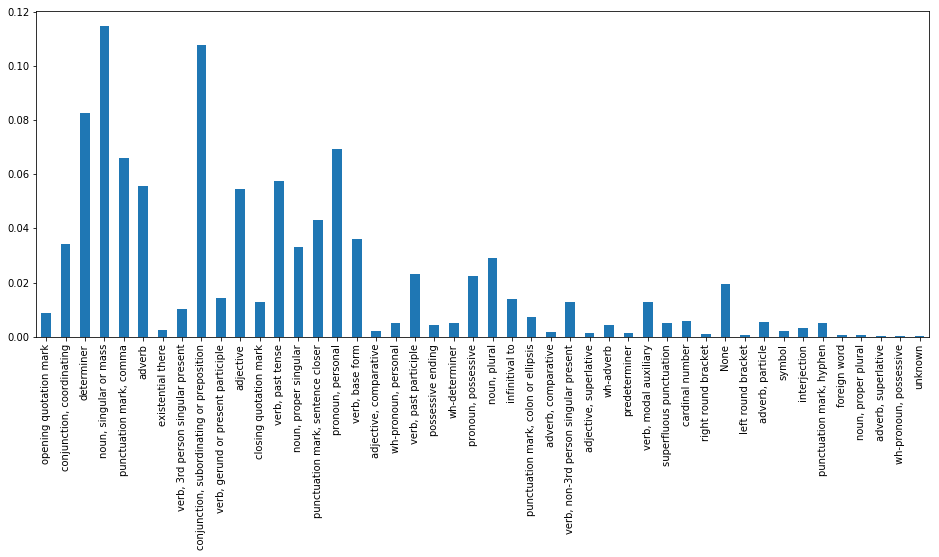

In [24]:
lastRaw = loadAndSample('chaps-midParas.txt')
lastSeries = analyzePOS(lastRaw)
lastSeries.plot(kind='bar')

# Compare

In [43]:
compDF = pd.DataFrame([firstSeries, midsSeries, lastSeries], index=['first', 'mid', 'last']).T

In [45]:
compDF['sum'] = compDF.sum(axis=1)

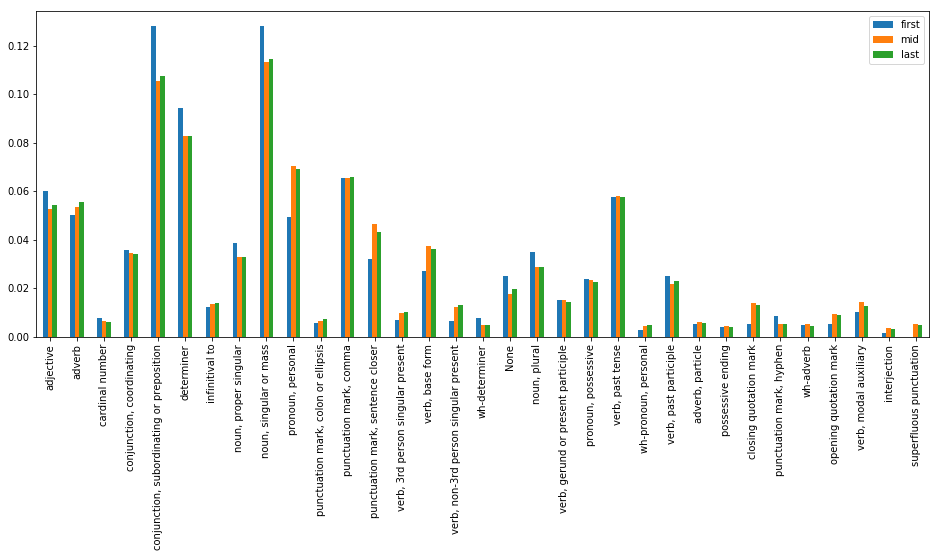

In [51]:
compDF[compDF['sum'] > 0.007][['first', 'mid', 'last']].plot(kind='bar')

# Analyze Sentence Lengths

In [53]:
def analyzeSentLength(raw):
    doc = nlp(raw)
    return pd.Series([len(sent) for sent in doc.sents])

In [55]:
firstSentLengths = analyzeSentLength(firstRaw)

In [ ]:
firstSentLengths.hist()

In [ ]:
midSentLengths = analyzeSentLength(midsRaw)
midSentLengths.hist()

In [ ]:
lastSentLengths = analyzeSentLength(lastRaw)
lastSentLengths.hist()

In [61]:
sentLengthDF = pd.DataFrame([firstSentLengths, midSentLengths, lastSentLengths], index=['first', 'mid', 'last'])

In [69]:
bins = np.histogram(firstSentLengths)[1]

In [107]:
bins = np.array([1., 10., 20., 30., 40., 50., 80., 100., 150., 200., 250., 300])

In [108]:
hists = [np.histogram(s, bins=bins, density=True)[0] for s in [firstSentLengths, midSentLengths, lastSentLengths]]

In [109]:
histDF = pd.DataFrame(hists, columns=bins[:-1], index=['first', 'mid', 'last']).T

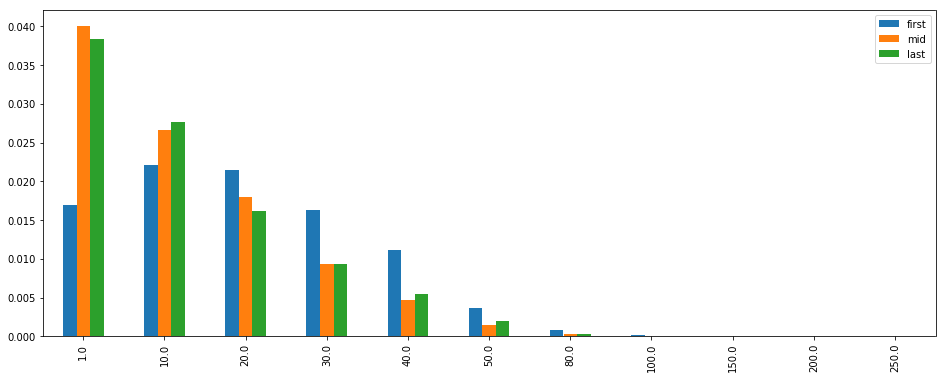

In [110]:
histDF.plot(kind='bar')

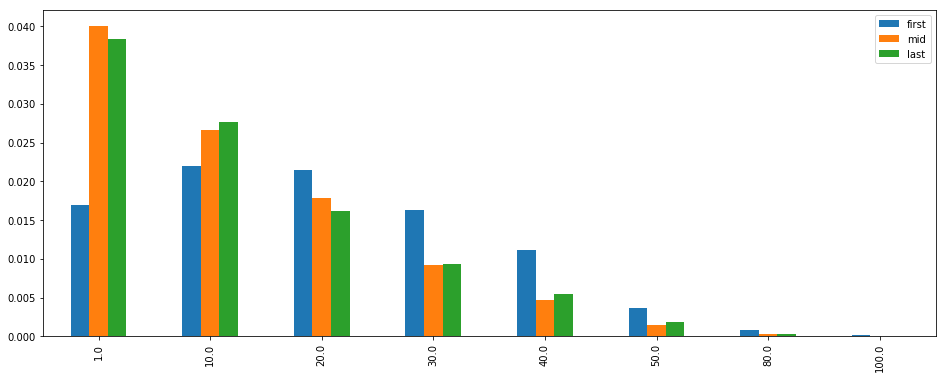

In [111]:
histDF.loc[:100].plot(kind='bar')

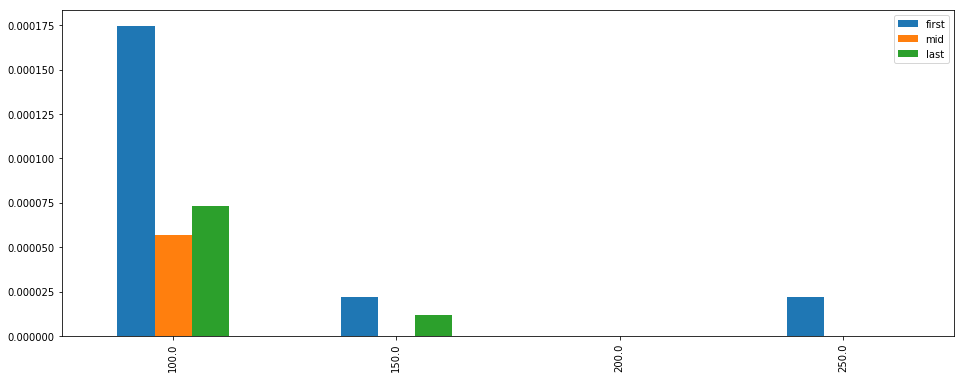

In [112]:
histDF.loc[100:].plot(kind='bar')

In [116]:
for s in [firstSentLengths, midSentLengths, lastSentLengths]:
    print(s.describe())

count    916.000000
mean      29.335153
std       22.445906
min        1.000000
25%       14.000000
50%       25.000000
75%       39.000000
max      268.000000
dtype: float64
count    3146.000000
mean       18.262556
std        16.911677
min         1.000000
25%         6.000000
50%        14.000000
75%        25.000000
max       135.000000
dtype: float64
count    3288.000000
mean       19.354319
std        18.495974
min         1.000000
25%         6.000000
50%        15.000000
75%        27.000000
max       167.000000
dtype: float64


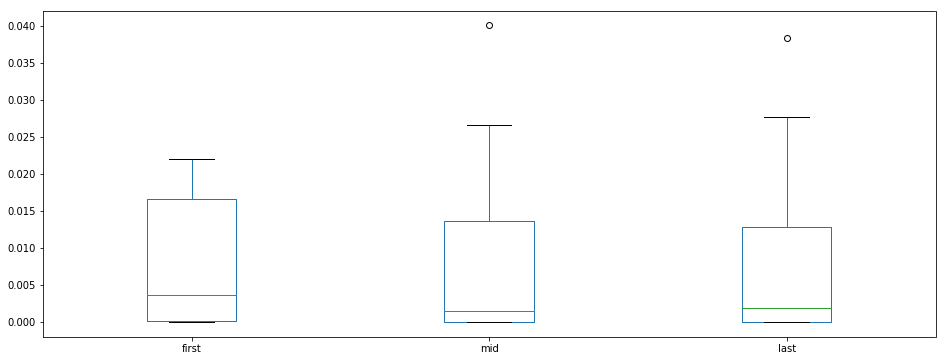

In [118]:
histDF.plot(kind='box')